In [43]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from keras.utils import plot_model
from keras.models import Model
from tensorflow.keras.utils import load_img,img_to_array

In [11]:
model = VGG16()

553467096/553467096 [==============================] - 7s 0us/step


In [12]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

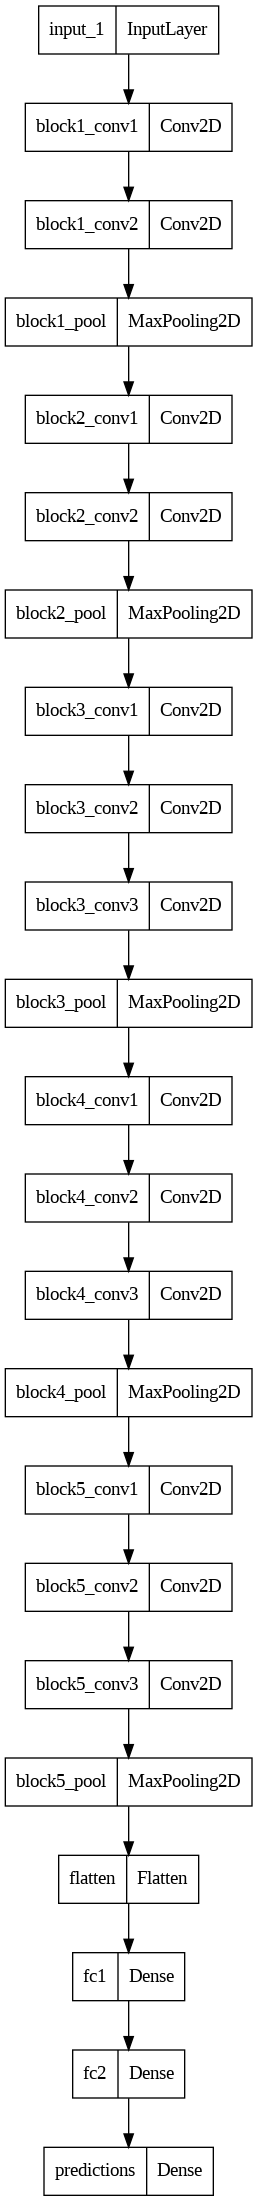

In [13]:
plot_model(model)

In [16]:
for i in range(len(model.layers)):
  if 'conv' not in model.layers[i].name:
    continue
  filters,biases= model.layers[i].get_weights()
  print("Layer Number",i,model.layers[i].name,filters.shape)

Layer Number 1 block1_conv1 (3, 3, 3, 64)
Layer Number 2 block1_conv2 (3, 3, 64, 64)
Layer Number 4 block2_conv1 (3, 3, 64, 128)
Layer Number 5 block2_conv2 (3, 3, 128, 128)
Layer Number 7 block3_conv1 (3, 3, 128, 256)
Layer Number 8 block3_conv2 (3, 3, 256, 256)
Layer Number 9 block3_conv3 (3, 3, 256, 256)
Layer Number 11 block4_conv1 (3, 3, 256, 512)
Layer Number 12 block4_conv2 (3, 3, 512, 512)
Layer Number 13 block4_conv3 (3, 3, 512, 512)
Layer Number 15 block5_conv1 (3, 3, 512, 512)
Layer Number 16 block5_conv2 (3, 3, 512, 512)
Layer Number 17 block5_conv3 (3, 3, 512, 512)


In [18]:
  filters,biases = model.layers[1].get_weights()

In [19]:
f_min,f_max = filters.min(),filters.max()
filters = (filters-f_min)/(f_max-f_min)

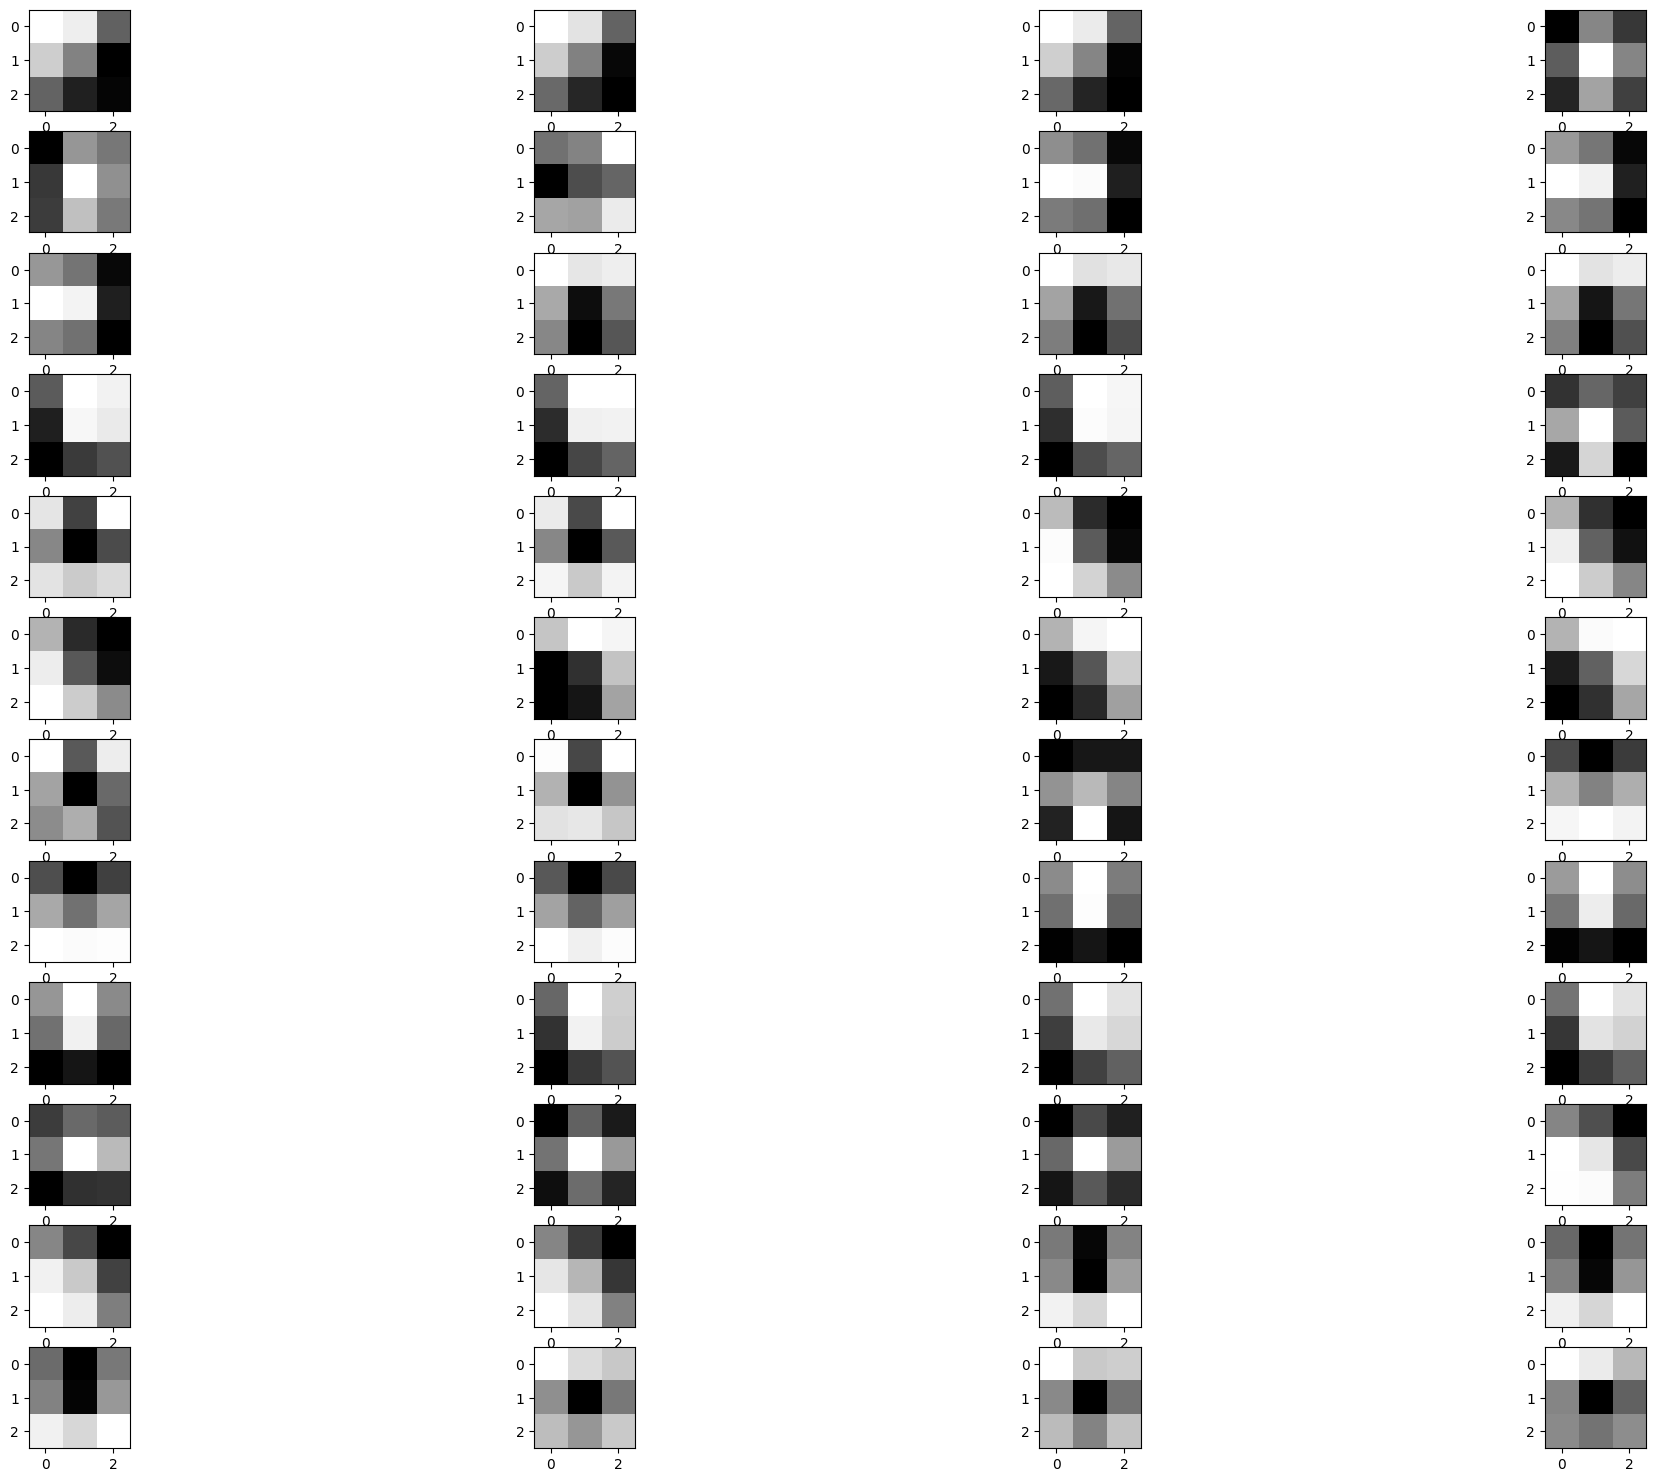

In [32]:
n_filters=16
idx = 1
fig = plt.figure(figsize=(25,25))
for i in range(n_filters):
  f = filters[:,:,:,i]
  for j in range(3):
    plt.subplot(n_filters,4,idx)
    plt.imshow(f[:,:,j],cmap='gray')
    idx+=1
plt.show();


In [35]:
model  = Model(inputs=model.inputs,outputs=model.layers[1].output)

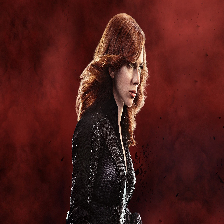

In [48]:
load_img('/content/853247.jpg',target_size=(224,224))

In [45]:
img = load_img('/content/853247.jpg',target_size=(224,224))
img = img_to_array(img)
img = np.expand_dims(img,axis=0)
img = preprocess_input(img)

1/1 [==============================] - 1s 1s/step


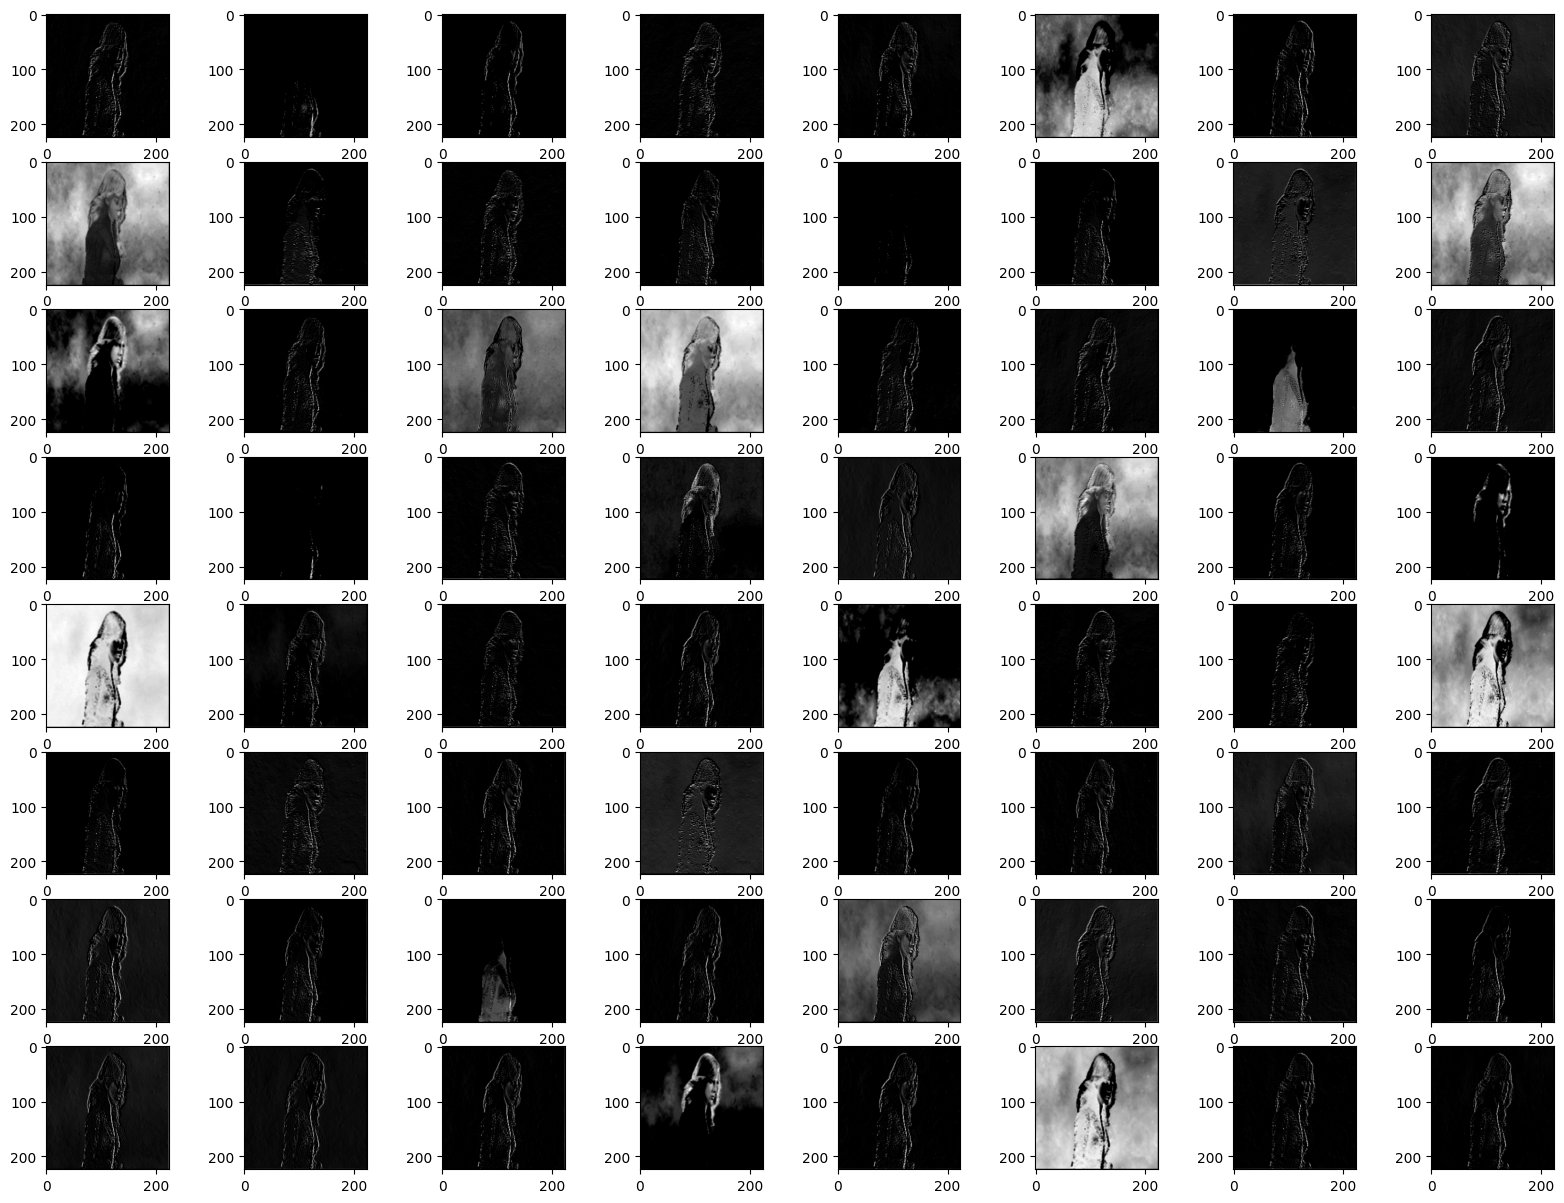

In [46]:
features = model.predict(img)

plt.figure(figsize=(20,15))

for i in range(1,features.shape[3]+1):
  plt.subplot(8,8,i)
  plt.imshow(features[0,:,:,i-1],cmap='gray')
plt.show()

In [49]:
model2 = VGG16()

In [51]:
layer_index=[2,5,9,13,17]
outputs = [model2.layers[i].output for i in layer_index]

model3 = Model(inputs=model2.inputs,outputs=outputs)

1/1 [==============================] - 1s 1s/step


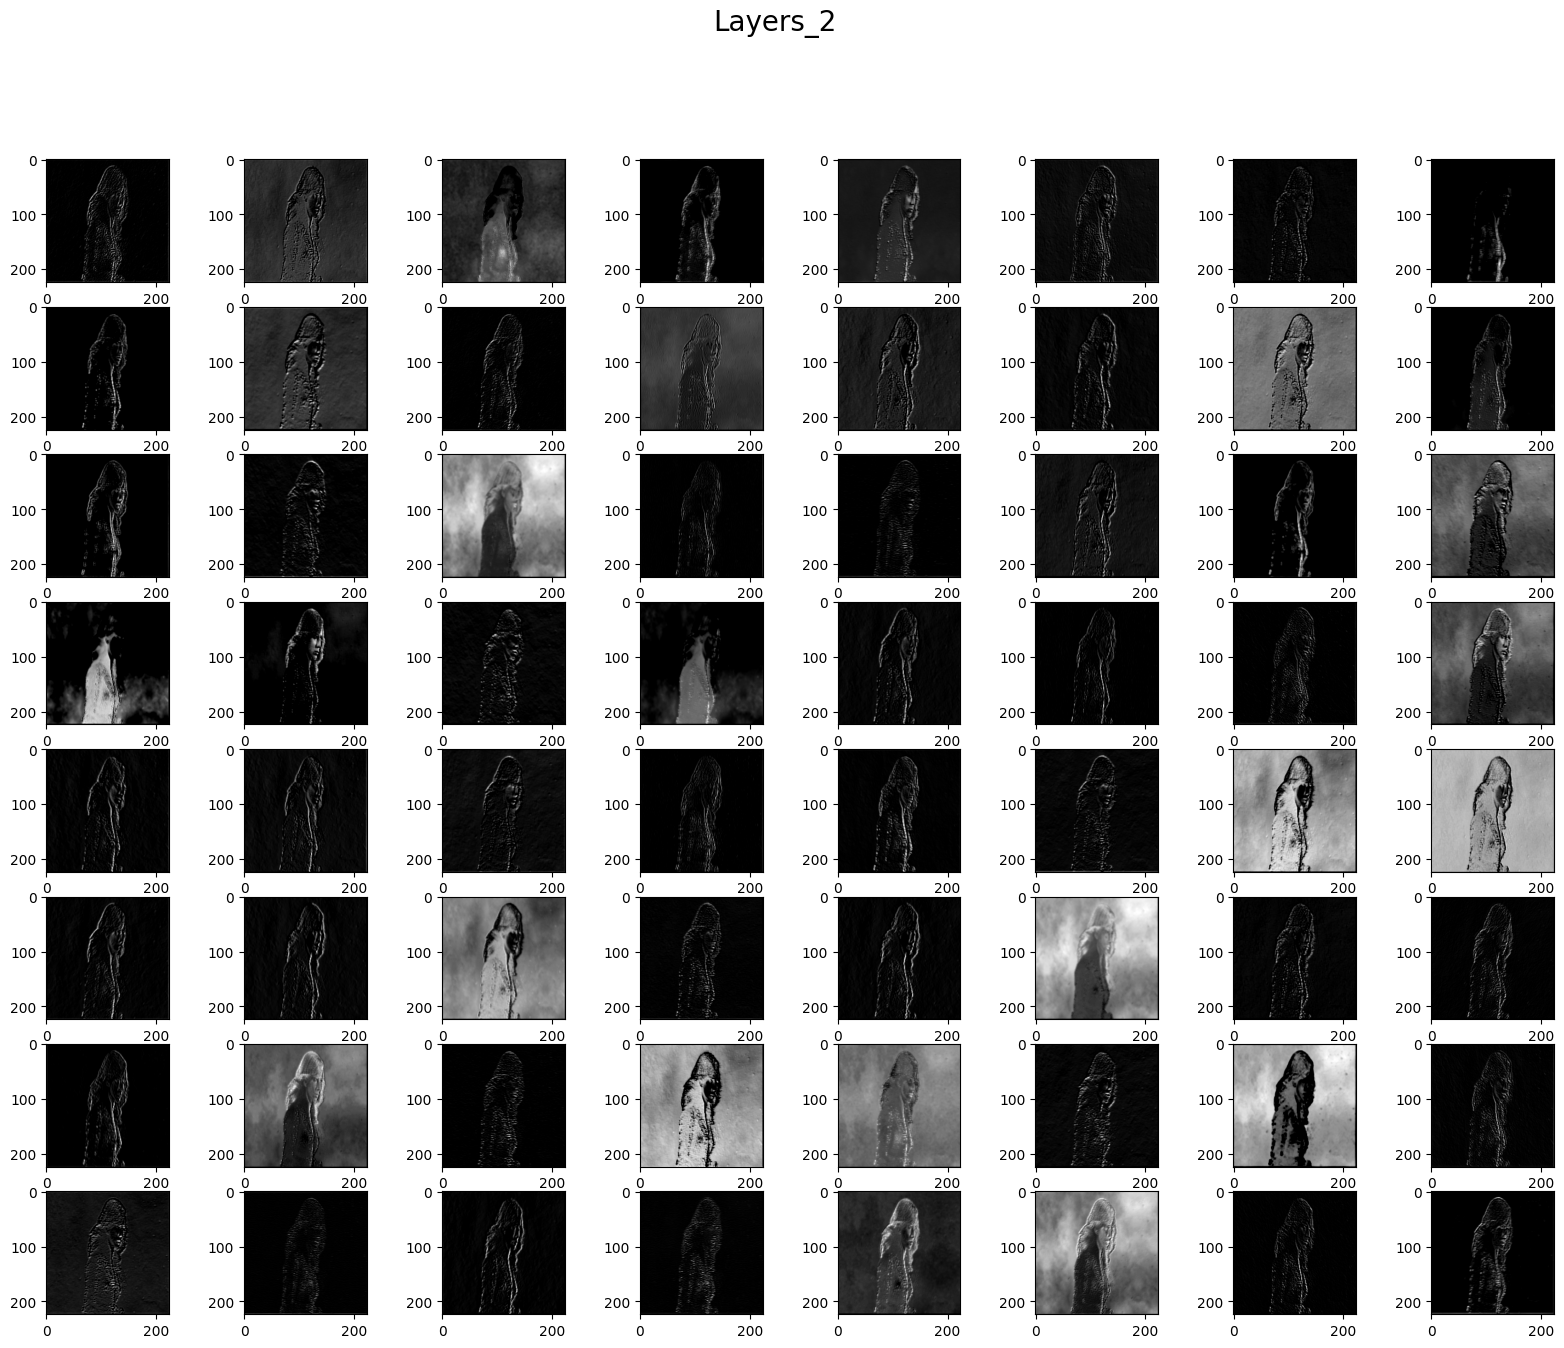

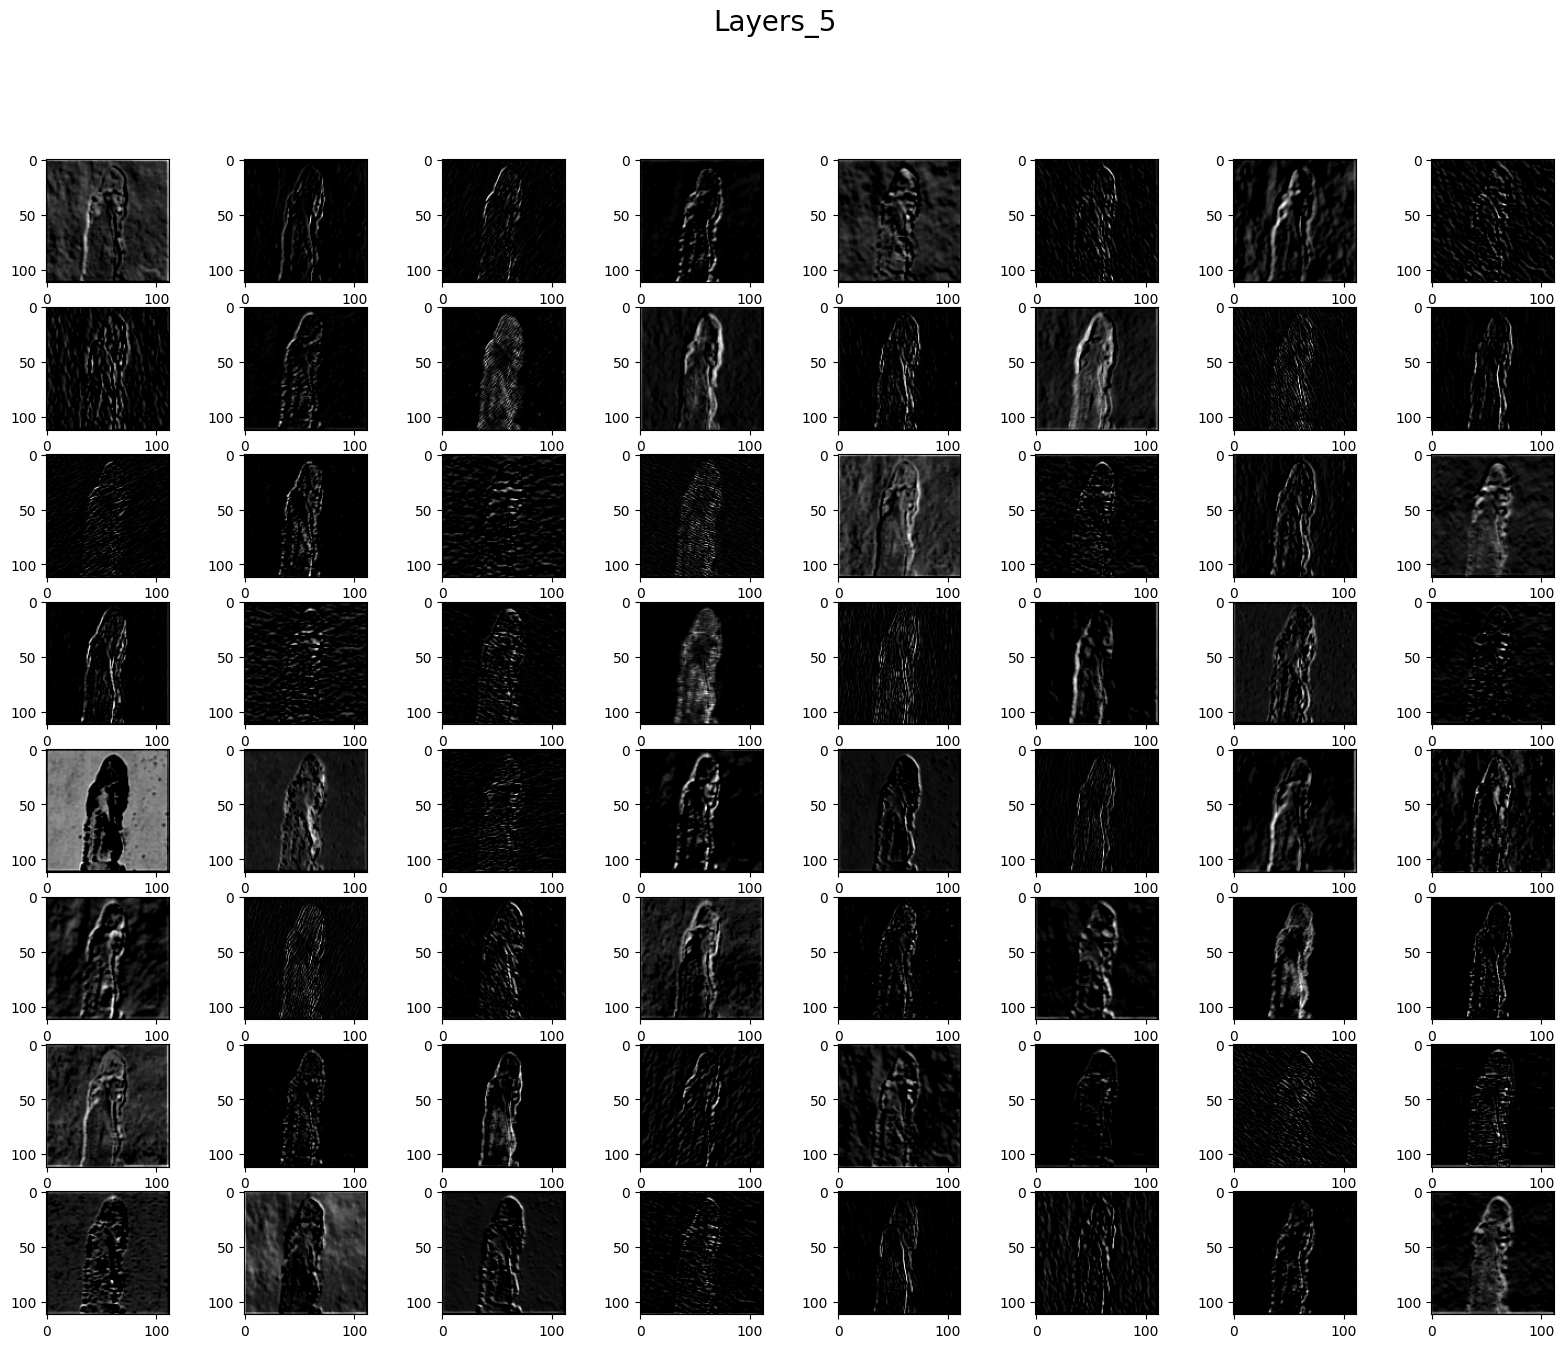

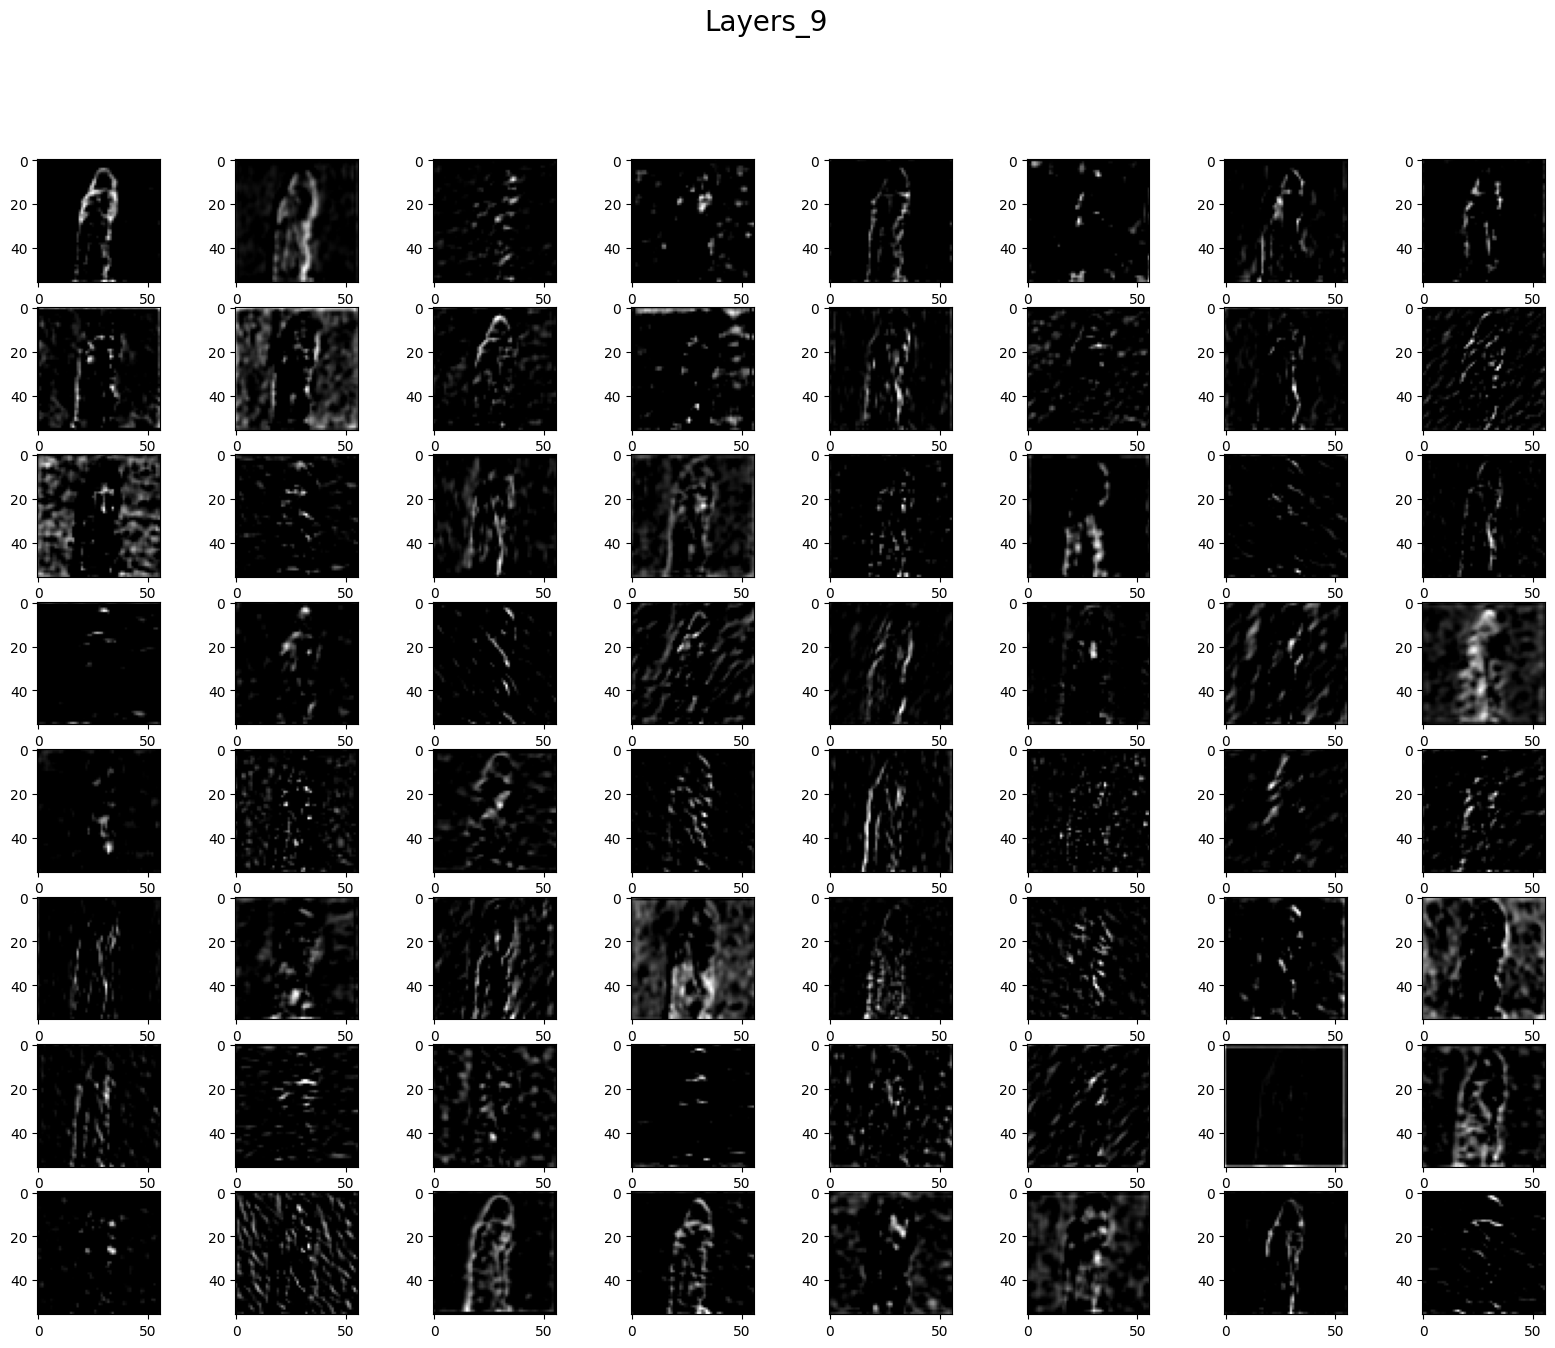

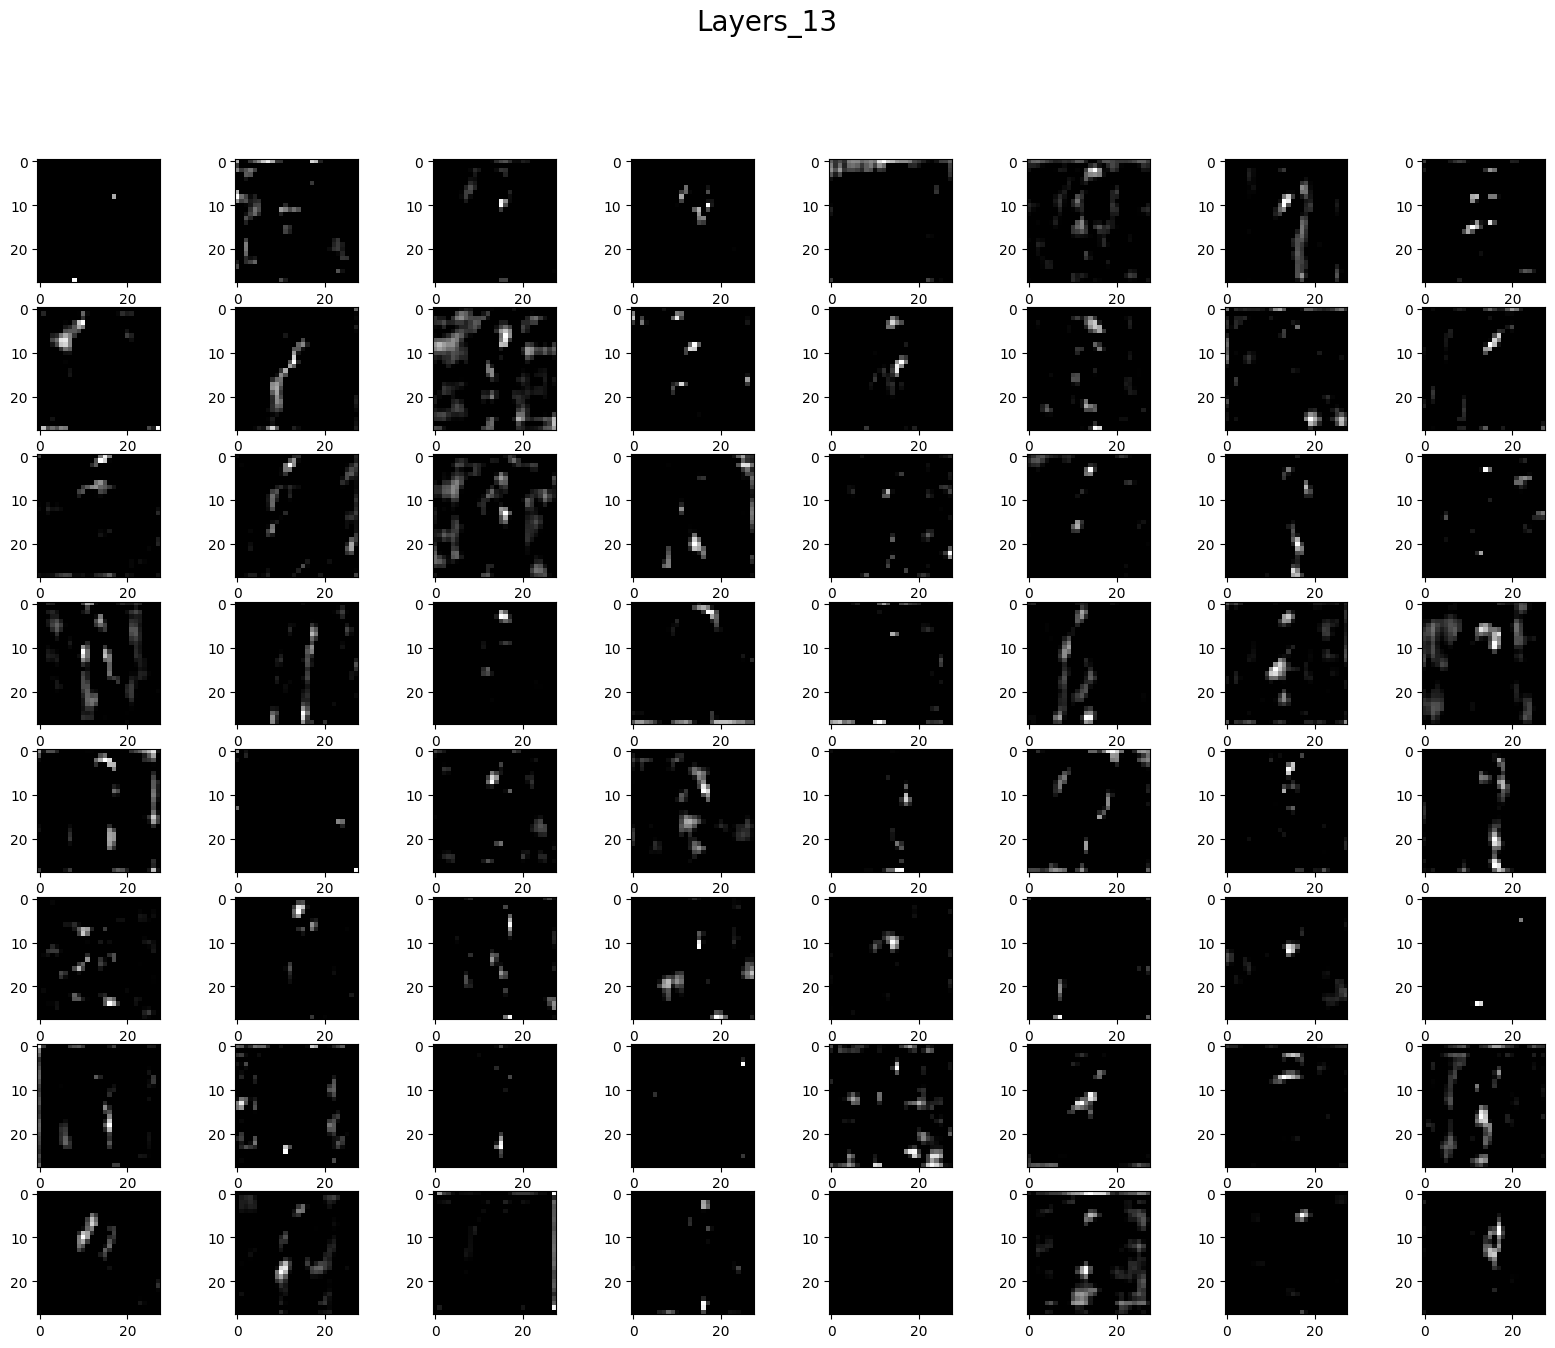

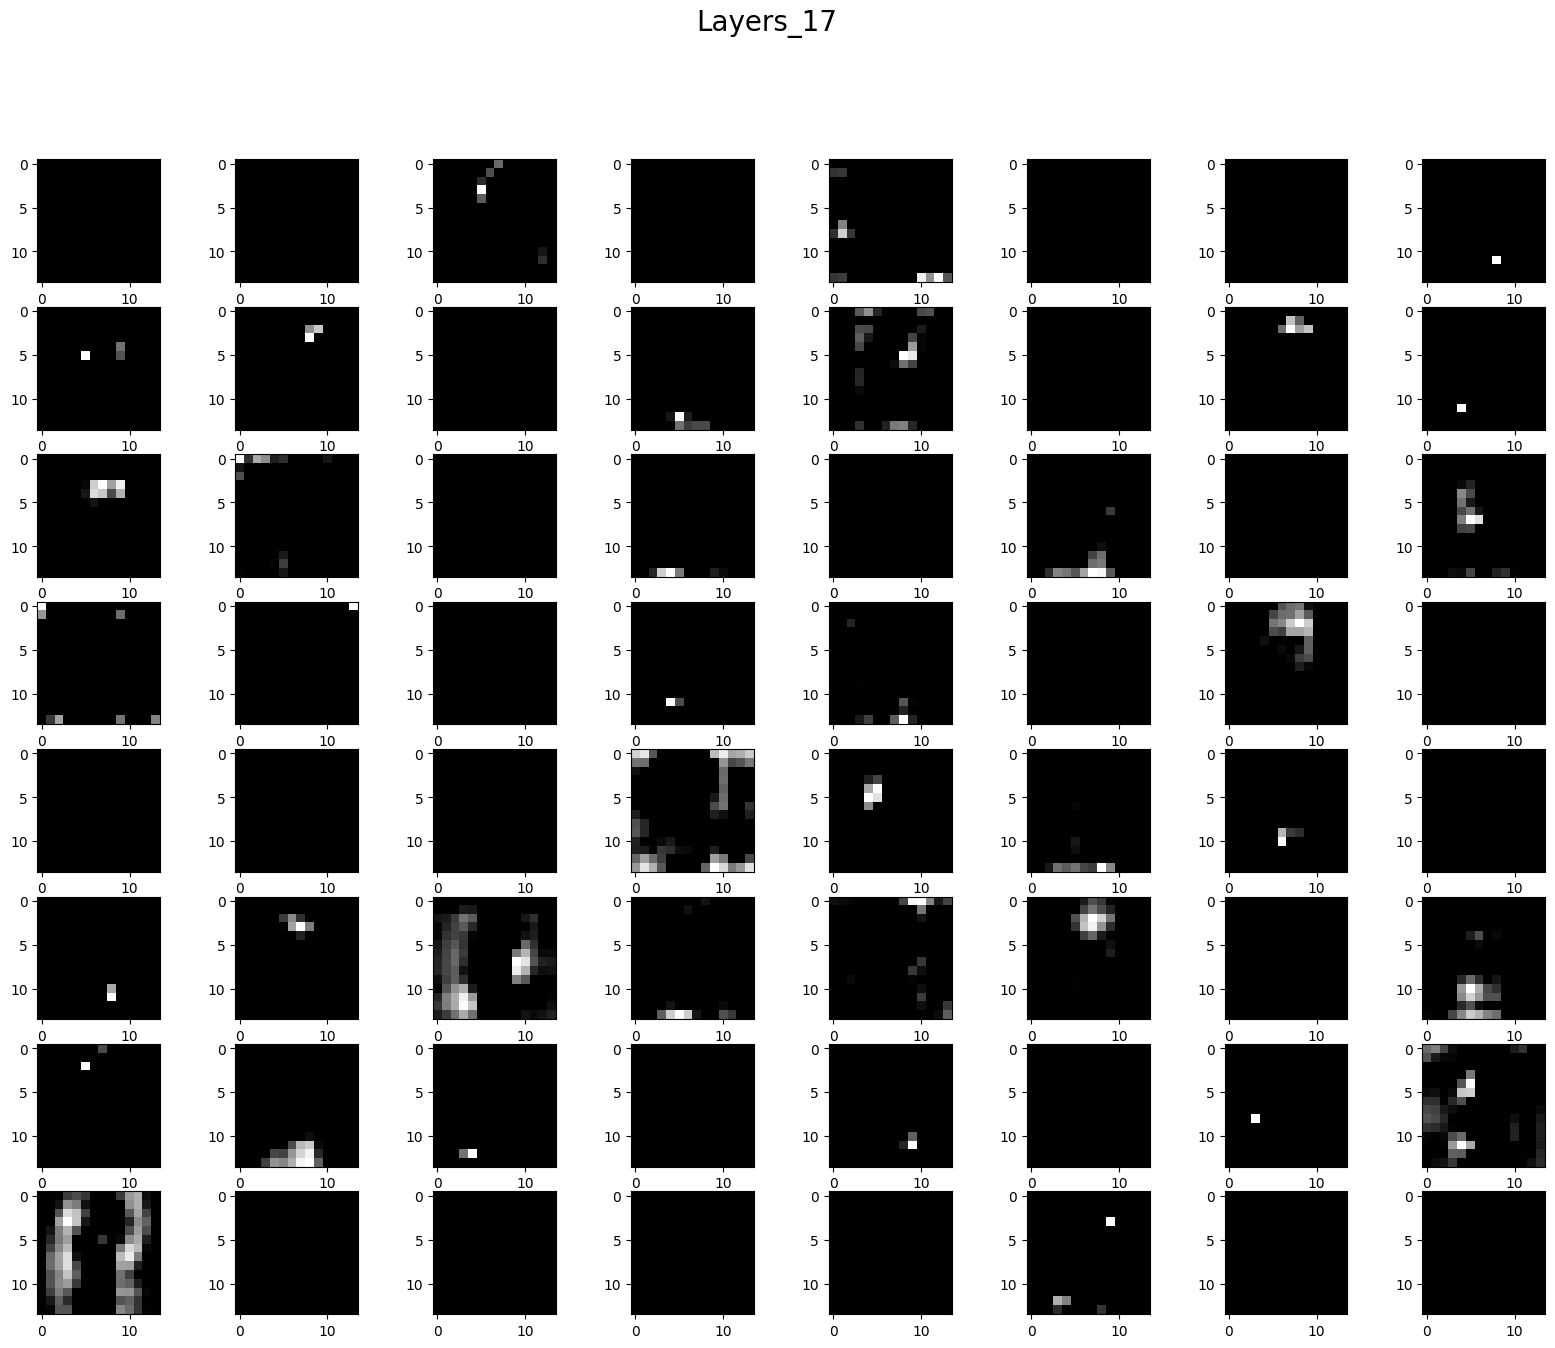

In [54]:
feature_map = model3.predict(img)


for i,fmap in zip(layer_index,feature_map):
  plt.figure(figsize=(20,15))
  plt.suptitle(f"Layers_{i}",fontsize=20)
  for i in range(1,features.shape[3]+1):
    plt.subplot(8,8,i)
    plt.imshow(fmap[0,:,:,i-1],cmap='gray')
  plt.show()
